<a href="https://colab.research.google.com/github/rutujabhosale24/Image_Classifier_using_Sequential_API/blob/main/Image_Classifier_using_Sequential_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.18.0'

Loading Data

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
fashion_mnist

<module 'keras.api.datasets.fashion_mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/fashion_mnist/__init__.py'>

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
X_train_full.shape,X_test.shape,y_train_full.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one.

Normalizing each pixel of the image in range of 0 to 1

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [10]:
y_train[0]

np.uint8(4)

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

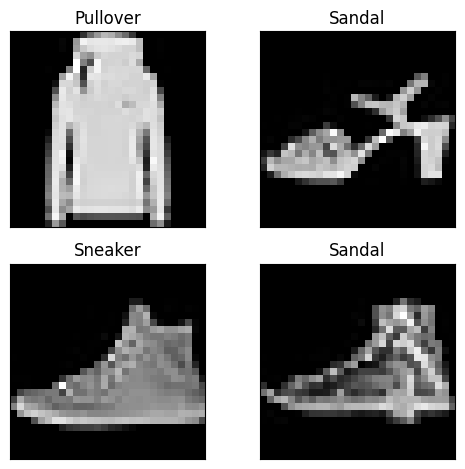

In [13]:
random_indices = random.sample(range(len(X_train)), 4)
#print(random_indices)
fig=plt.figure()
for i, items in enumerate(random_indices):
  plt.subplot(2,2,i+1)
  plt.imshow(X_train[items],cmap='gray')
  plt.title(class_names[y_train[items]])
  plt.xticks([])
  plt.yticks([])
  plt.tight_layout()

In [15]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6887 - loss: 0.9862 - val_accuracy: 0.8184 - val_loss: 0.5285
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8241 - loss: 0.4993 - val_accuracy: 0.8284 - val_loss: 0.4791
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8435 - loss: 0.4491 - val_accuracy: 0.8632 - val_loss: 0.4065
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8503 - loss: 0.4256 - val_accuracy: 0.8648 - val_loss: 0.3969
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8563 - loss: 0.4010 - val_accuracy: 0.8582 - val_loss: 0.3915
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8654 - loss: 0.3811 - val_accuracy: 0.8674 - val_loss: 0.3848
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8704 - loss: 0.3677 - val_accuracy: 0.8730 - val_loss: 0.3560
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8737 - loss: 0.3572 -

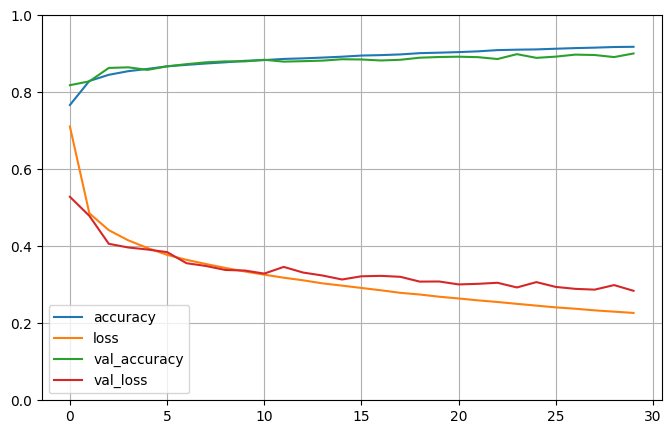

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8857 - loss: 0.3238


[0.32037678360939026, 0.8859999775886536]

In [22]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
y_pred = np.argmax(y_proba, axis=1)    # Get the class with highest probability
y_pred

array([9, 2, 1])

In [24]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [26]:
y_proba = model.predict(X_test)
y_pred = np.argmax(y_proba, axis=1)    # Get the class with highest probability

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

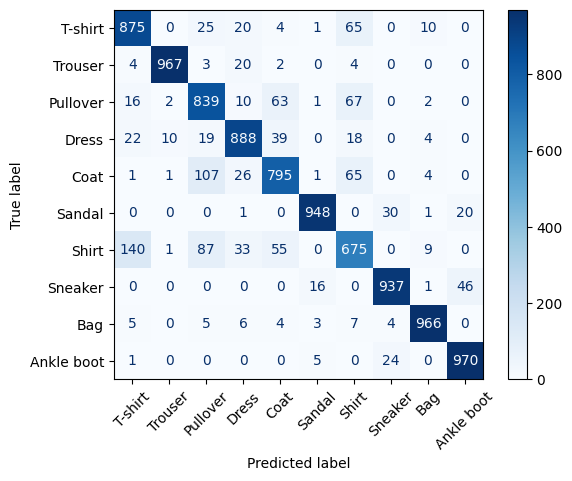

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])
disp.plot(cmap='Blues', xticks_rotation=45)

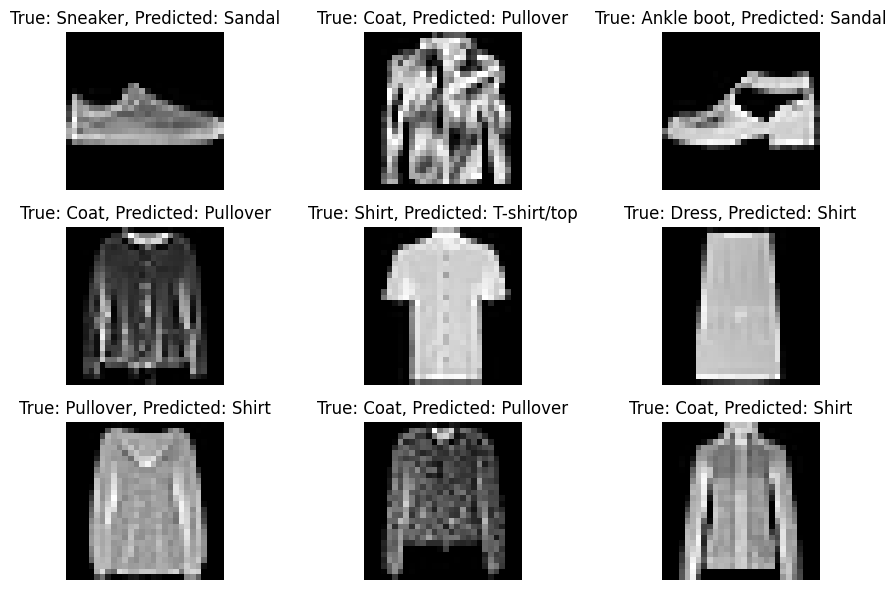

In [30]:
# Find misclassified indices
misclassified_idx = np.where(y_pred != y_test)[0]

# Plot 9 misclassified images
plt.figure(figsize=(10,6))
for i, idx in enumerate(misclassified_idx[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}, Predicted: {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
